In [1]:
# only for test

import csv
import glob, os
import pandas as pd

print('aa')
print(os.path.abspath('.'))

aa
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src


In [2]:
# initialisation
# TODO: move all packages here but not for now

featureDict = {'down': {} , 'up': {}, 'left': {}, 'right': {}, 'fist': {}}


In [105]:
# load data from csv files
# feature extraction
# TODO: freq-domain features 
# TODO: feature selection
# TODO: normalisation

import math
import numpy as np
import csv
import glob, os
import pandas as pd

# locate folers
actionList = ['down', 'up', 'left', 'right', 'fist']
for currentAction in range(len(actionList)):
    filePath1 = os.path.abspath('./Dataset/hyqData/' + actionList[currentAction])
    filePath2 = os.path.abspath('./Dataset/zjhData/' + actionList[currentAction])
    filePath3 = os.path.abspath('./Dataset/sgfData/' + actionList[currentAction])
#     filePath4 = os.path.abspath('./Dataset/znData/' + actionList[currentAction])

    print('Loading action: ' + actionList[currentAction])


    file1 = glob.glob(os.path.join(filePath1, "*.csv"))
    file2 = glob.glob(os.path.join(filePath2, "*.csv"))
    file3 = glob.glob(os.path.join(filePath3, "*.csv"))
#     file4 = glob.glob(os.path.join(filePath4, "*.csv"))


    dl = []
    for f in file1:
        dl.append(pd.read_csv(f, header=None))
    for f in file2:
        dl.append(pd.read_csv(f, header=None))
    for f in file3:
        dl.append(pd.read_csv(f, header=None))
#     for f in file4:
#         dl.append(pd.read_csv(f, header=None))



    # obtain each EMG channel data
    

    featureList = []

    index=0
    currentCSV=0
    for index in range(len(dl)): # access every csv file
        emg_1=[]
        emg_2=[]
        emg_3=[]
        for currentCSV in range(len(dl[index].values.tolist())): # access every recorded sample
            emg_1.append(dl[index].values.tolist()[currentCSV][0])
            emg_2.append(dl[index].values.tolist()[currentCSV][1])
            emg_3.append(dl[index].values.tolist()[currentCSV][2])


        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        MAV_emg_1 = 0
        MAV_emg_2 = 0
        MAV_emg_3 = 0
        # Wavelength
        WL_emg_1 = 0
        WL_emg_2 = 0
        WL_emg_3 = 0
        # Slope Sign Changes
        SSCthreshold = 0 # TODO: detemine the threshold
        SSC_emg_1 = 0
        SSC_emg_2 = 0
        SSC_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        ZC_emg_1 = 0
        ZC_emg_2 = 0
        ZC_emg_3 = 0
        # Root Mean Square
        RMS_emg_1 = 0.0
        RMS_emg_2 = 0.0
        RMS_emg_3 = 0.0

        
        temp1=0
        temp2=0
        temp3=0
        temp4=0
        temp5=0
        temp6=0
        temp7=0.0
        temp8=0.0
        temp9=0.0
        i=0
        for i in range(len(emg_3)):
            temp1 = temp1 + abs(int(emg_1[i]))
            temp2 = temp2 + abs(int(emg_2[i]))
            temp3 = temp3 + abs(int(emg_3[i]))
            temp7 = temp7 + (int(emg_1[i]))**2
            temp8 = temp8 + (int(emg_2[i]))**2
            temp9 = temp9 + (int(emg_3[i]))**2
        

            if(i>0):
                WL_emg_1 = WL_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                WL_emg_2 = WL_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                WL_emg_3 = WL_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))

            if(i>1):
                temp4 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                temp5 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                temp6 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if temp4 >= SSCthreshold:
                    SSC_emg_1 = SSC_emg_1 + 1
                if temp5 >= SSCthreshold:
                    SSC_emg_2 = SSC_emg_2 + 1
                if temp6 >= SSCthreshold:
                    SSC_emg_3 = SSC_emg_3 + 1


            MAV_emg_1 = temp1/len(emg_1)
            MAV_emg_2 = temp2/len(emg_2)
            MAV_emg_3 = temp3/len(emg_3)

            RMS_emg_1 = math.sqrt(temp7/len(emg_1))
            RMS_emg_2 = math.sqrt(temp8/len(emg_2))
            RMS_emg_3 = math.sqrt(temp9/len(emg_3))

        featureDict[actionList[currentAction]][index] = [MAV_emg_1, MAV_emg_2, MAV_emg_3, WL_emg_1, WL_emg_2, WL_emg_3, SSC_emg_1, SSC_emg_2, SSC_emg_3, RMS_emg_1, RMS_emg_2, RMS_emg_3]

print('Loading completed')

    # print(MAV_emg_1, MAV_emg_2, MAV_emg_3)
    # print(WL_emg_1, WL_emg_2, WL_emg_3)
    # print(SSC_emg_1, SSC_emg_2, SSC_emg_3)
    # print(RMS_emg_1, RMS_emg_2, RMS_emg_3)


Loading action: down
Loading action: up
Loading action: left
Loading action: right
Loading action: fist
Loading completed


In [111]:
print(emg_3)

[230, 232, 231, 231, 229, 241, 232, 232, 225, 214, 225, 244, 264, 274, 251, 276, 296, 341, 403, 384, 365, 352, 403, 412, 513, 482, 521, 540, 588, 539, 486, 477, 481, 479, 449, 420, 409, 387, 366, 351, 312, 280, 268, 255, 244, 242, 237, 242, 241, 247, 257, 258, 263, 257, 252, 238, 230, 214, 195, 178, 165, 159, 155, 158, 160, 166, 174, 178, 185, 190, 195, 202, 206, 211, 215, 218, 223, 224, 229, 230, 233, 234, 233, 235, 236, 236, 236, 233, 233, 231, 229, 227, 223, 223, 218, 217, 214, 212, 210, 206, 205, 199, 197, 193, 191, 189, 184, 184, 179, 178, 175, 172, 170, 167, 166, 163, 161, 159, 156, 155, 152, 152, 148, 148, 145, 143, 143, 140, 141, 138, 139, 138, 137, 137, 134, 133, 132, 131, 130, 128, 129, 126, 126, 125, 126, 125, 125, 126, 123, 124, 121, 120, 119, 118, 117, 114, 115, 113, 112, 111, 110, 110, 108, 108, 105, 105, 105, 104, 103, 101, 102, 100, 101, 100, 99, 99, 98, 100, 98, 98, 97, 98, 97, 97, 97, 96, 97, 96, 97, 95, 96, 95, 95, 95, 95, 95, 94, 94, 94, 94, 93, 92, 92, 92, 92, 92, 

0.8781626790867191
28.90625
21.91596608539089
2.512096817876756


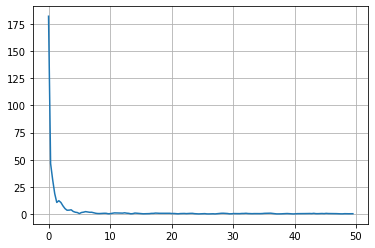

In [178]:
# frequency-domain features
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# os.path.abspath('./Dataset/hyqData')
# dl = []
# for f in file1:
#     dl.append(pd.read_csv(f, header=None))
    
# emg_1=[]
# emg_2=[]
# emg_3=[]

# for row in range(len(dl[0])):
#     emg_1.append(dl[0].values.tolist()[row][0])
#     emg_2.append(dl[0].values.tolist()[row][1])
#     emg_3.append(dl[0].values.tolist()[row][2])

# mean frequency
meanFreq = 0
# variance of central frequency
VCF=0
# median frequency
medianFreq = 0
# mean power
meanPower = 0



T=1/100 # sample rate
N=len(emg_2[0:299])
freqDict={}
yf=fft(emg_2[0:299])
xf = fftfreq(N, T)[:N//2] #0.3344 per sample
freqDict={}

freqs, psd = signal.welch(signal.detrend(emg_3), 100)
nominatorValue=0
denominatorValue=0
SM2=0
for i in range(len(freqs)):
    nominatorValue += freqs[i]*psd[i]
    denominatorValue += psd[i]
    SM2 += np.square(freqs[i])*psd[i] 
    
meanFreq = nominatorValue/denominatorValue

medianFreq = freqs[np.argsort(psd)[len(psd)//2]]

meanPower = denominatorValue/len(freqs)


VCF = SM2/denominatorValue - np.square(nominatorValue/denominatorValue)

print(meanFreq)
print(medianFreq)
print(meanPower)
print(VCF)


# Pxx_den = np.reshape( Pxx_den, (1,-1) ) 
# width = np.tile(f[1]-f[0], (1, Pxx_den.shape[1]))
# f = np.reshape(f, (1, -1))
# P = Pxx_den * width
# pwr = np.sum(P)
# mnfreq = np.dot(P, f.T)/pwr




plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
plt.grid()
plt.show()


In [153]:
listtemp = (2.0/N * np.abs(yf[0:N//2][:]))
print(xf[3]-xf[2]) #

print(len(freqs))

0.33444816053511706
129


In [4]:
# TODO: feature selection
# TODO: visualisation (if possible)

print(featureDict.keys())
print(len(featureDict['down']))
print(len(featureDict['up']))
print(len(featureDict['left']))
print(len(featureDict['right']))
print(len(featureDict['fist']))
print(featureDict['down'][0])
print(featureDict['up'][0])
print(featureDict['left'][0])
print(featureDict['right'][0])
print(featureDict['fist'][0])


dict_keys(['down', 'up', 'left', 'right', 'fist'])
75
70
69
70
75
[39.693333333333335, 55.17666666666667, 74.89666666666666, 499, 522, 1652, 219, 196, 215, 46.753894668430206, 64.37931862536809, 170.15286264611203]
[17.243333333333332, 171.14, 105.74333333333334, 40, 1030, 610, 297, 147, 157, 17.271460081108756, 216.06070134725258, 131.5700700514115]
[52.26, 71.05666666666667, 18.476666666666667, 964, 774, 168, 227, 198, 255, 85.64395289024594, 101.17929630117023, 27.522899556551085]
[59.38, 72.19, 59.7, 966, 705, 1261, 195, 174, 232, 76.48424674401913, 85.48288327690716, 137.3561550616984]
[58.67666666666667, 118.07333333333334, 32.553333333333335, 1285, 1341, 802, 226, 168, 234, 103.38170373265604, 130.02540777350657, 53.41891050929436]


(215, 12)
(215, 6)
(73, 12)
(73, 6)
(71, 12)
(71, 6)
Epoch 1/50
5/5 [==============================] - 0s 53ms/step - loss: 13815.7266 - accuracy: 0.2093 - val_loss: 8803.7490 - val_accuracy: 0.2466
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 7339.5923 - accuracy: 0.2233 - val_loss: 4887.7305 - val_accuracy: 0.1370
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 3598.7104 - accuracy: 0.1814 - val_loss: 2277.3872 - val_accuracy: 0.2055
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 1946.9452 - accuracy: 0.1674 - val_loss: 1014.2363 - val_accuracy: 0.1781
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 1131.4908 - accuracy: 0.1860 - val_loss: 830.8138 - val_accuracy: 0.2466
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 723.5333 - accuracy: 0.3860 - val_loss: 516.9742 - val_accuracy: 0.4384
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 509.2912 - acc

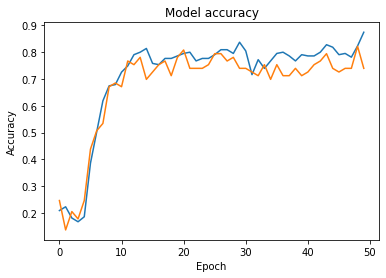

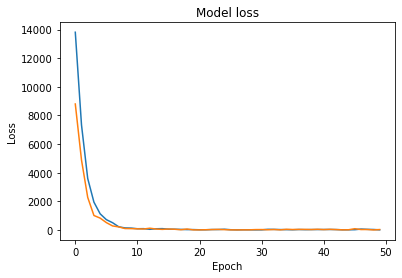

Test loss: 28.284318923950195
Test accuracy: 0.7746478915214539


In [5]:
# create labels for data samples

from keras.utils import np_utils
x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'left': 1,
        'right': 2,
        'up': 3,
        'down': 4,
        'fist': 5
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['down', 'up', 'left', 'right', 'fist']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)


state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)




# TODO: Model

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
tf.random.set_seed(1234)

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(x_train.shape)))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

# opt = RMSprop(lr=0.1, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=50, batch_size=50, validation_data=(x_validate, y_validate_class))

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])